#### By setting up the random initial value, we can eliminate the number to explore and select the optimal bandit. 

#### we can properly estimate the probability each bandit. we can only estimate the optimal bandit, since we stopping exploring suboptimal bandit

In [1]:
import matplotlib.pyplot as plt
import numpy as np

randint = 5

class Bandit:
    def __init__(self, p):
        # p: the win rate
        self.p = p
        self.p_estimate = randint
        self.initial_p = randint
        self.N =  1

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        # TODO
        self.N += 1
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N


In [2]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

def experiment():
    
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    payments = [[],[],[]]
    
    rewards = np.zeros(NUM_TRIALS)
    
    for i in range(NUM_TRIALS):
        
        # use optimistic initial values to select the next bandit
        j = np.argmax([b.p_estimate for b in bandits])

        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        # update rewards log
        rewards[i] = x
        
        payments[j].append(x)

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)


  # print mean estimates for each bandit
    for idx, b in enumerate(bandits):
        print("mean estimate:", b.p_estimate)
        print('initial estimate', b.initial_p)
        # print total reward
        print("total reward earned:", sum(payments[idx]))
        
        print("overall win rate:", sum(payments[idx]) / len(payments[idx]))
        
        print("num times selected each bandit:", [b.N for b in bandits])

        # plot the results
        cumulative_rewards = np.cumsum(payments[idx])
        
        win_rates = cumulative_rewards / (np.arange(len(payments[idx])) + 1)
        plt.ylim([0, 1])
        plt.plot(win_rates)
        plt.plot(np.ones(len(payments[idx]))*b.p)
        plt.show()


mean estimate: 0.6923076923076923
initial estimate 5
total reward earned: 4
overall win rate: 0.3333333333333333
num times selected each bandit: [13, 23, 9967]


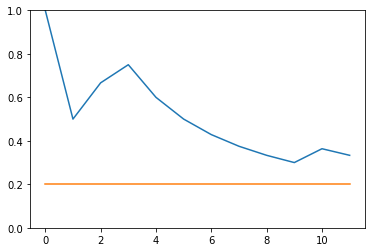

mean estimate: 0.6956521739130435
initial estimate 5
total reward earned: 11
overall win rate: 0.5
num times selected each bandit: [13, 23, 9967]


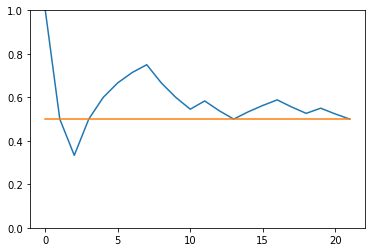

mean estimate: 0.7482692886525543
initial estimate 5
total reward earned: 7453
overall win rate: 0.7478426650612081
num times selected each bandit: [13, 23, 9967]


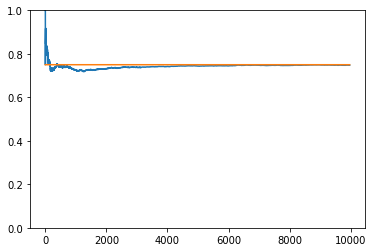

In [3]:
if __name__ == "__main__":
    experiment()